In [15]:
import pandas as pd
import geopandas as gpd

### Load data

#### Get crime data by postcodes

In [16]:
crime = pd.read_csv("../data/processed/poa_crime.csv")
crime.shape

(9001, 4)

In [17]:
crime.head()

,Year,Local Government Area,Postcode,Total Incidents
0,2011,Alpine,3691,5
1,2011,Alpine,3697,4
2,2011,Alpine,3698,3
3,2011,Alpine,3699,13
4,2011,Alpine,3737,153


In [24]:
crime.dtypes

Year                      int64
Local Government Area    object
Postcode                 object
Total Incidents           int64
dtype: object

In [23]:
crime.Postcode = crime.Postcode.astype(str)

#### Get shapefile of postcodes

In [18]:
poa_gdf = gpd.read_file("zip://../data/raw/shapefile/poa_2016_aust_shape.zip")
poa_gdf.shape

(2670, 4)

In [19]:
poa_gdf.head()

,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,0800,0800,3.1734,"POLYGON ((130.83454 -12.45798, 130.83395 -12.4..."
1,0810,0810,23.7902,"POLYGON ((130.84711 -12.37754, 130.84726 -12.3..."
2,0812,0812,35.8899,"POLYGON ((130.89192 -12.36879, 130.89221 -12.3..."
3,0815,0815,0.6381,"POLYGON ((130.87240 -12.37655, 130.87235 -12.3..."
4,0820,0820,39.0462,"POLYGON ((130.83499 -12.43006, 130.83508 -12.4..."


In [21]:
poa_gdf.dtypes

POA_CODE16      object
POA_NAME16      object
AREASQKM16     float64
geometry      geometry
dtype: object

In [ ]:
### Get postcodes in Victoria


### Join data

In [25]:
crime_gdf = crime.merge(poa_gdf, how="left", left_on="Postcode", right_on="POA_CODE16")
crime_gdf.shape

(9001, 8)

In [26]:
crime_gdf.head()

,Year,Local Government Area,Postcode,Total Incidents,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,2011,Alpine,3691,5,3691,3691,1837.4123,"MULTIPOLYGON (((146.90262 -36.10540, 146.90189..."
1,2011,Alpine,3697,4,3697,3697,140.6154,"POLYGON ((147.13594 -36.69941, 147.13629 -36.6..."
2,2011,Alpine,3698,3,3698,3698,48.8349,"POLYGON ((147.13954 -36.72241, 147.14057 -36.7..."
3,2011,Alpine,3699,13,3699,3699,502.9748,"POLYGON ((147.16186 -36.73468, 147.16187 -36.7..."
4,2011,Alpine,3737,153,3737,3737,1737.5617,"POLYGON ((146.65912 -36.54841, 146.65910 -36.5..."


In [29]:
crime_gdf = gpd.GeoDataFrame(crime_gdf)

In [30]:
crime_gdf.shape, type(crime_gdf)

((9001, 8), geopandas.geodataframe.GeoDataFrame)

<AxesSubplot:>

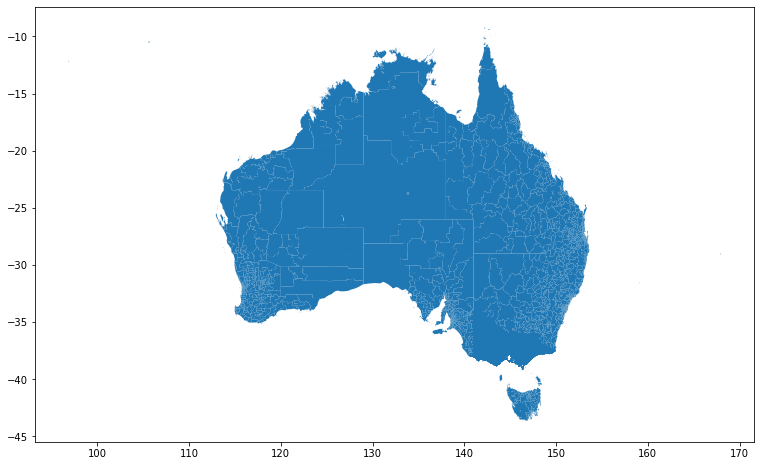

In [32]:
ax = poa_gdf.plot(figsize=(14,8))
crime_gdf.plot(ax=ax)